## <center> Universidade Federal do Ceará & SiDi - Residência em Segurança da Informação <center>
    
    Grupo 2 - IoT
    Tarefa: Exploração
    Equipe: Davyson Ribeiro, Erik Jhones Freitas, Juliana Lima
    Matrículas: 543043, 543036, 543037

In [1]:
#Bibliotecas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [3]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

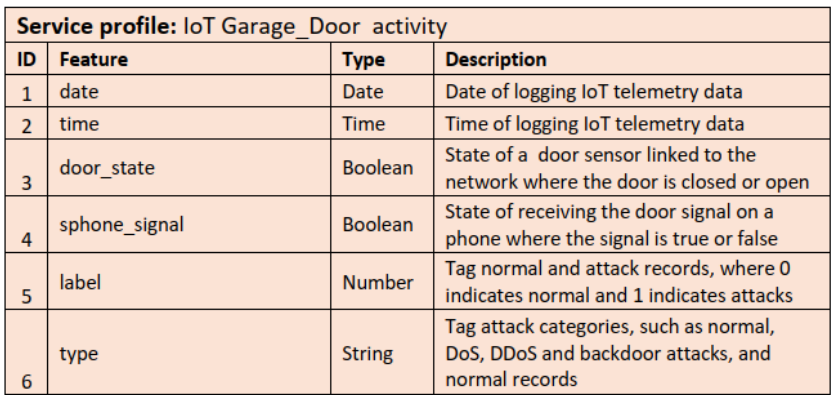

In [6]:
Train_Test_IoT_Garage_Door = pd.read_csv('datasets/Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door.csv')
Train_Test_IoT_Garage_Door

,ts,date,time,door_state,sphone_signal,label,type
0,1556228553,25-Apr-19,14:42:33,closed,0,1,ddos
1,1556228558,25-Apr-19,14:42:38,closed,0,1,ddos
2,1556228563,25-Apr-19,14:42:43,closed,0,1,ddos
3,1556228568,25-Apr-19,14:42:48,closed,0,1,ddos
4,1556228578,25-Apr-19,14:42:58,closed,0,1,ddos
...,...,...,...,...,...,...,...
59582,1554203357,2-Apr-19,04:09:17,closed,false,0,normal
59583,1554203357,2-Apr-19,04:09:17,open,true,0,normal
59584,1554203357,2-Apr-19,04:09:17,closed,false,0,normal
59585,1554203357,2-Apr-19,04:09:17,closed,false,0,normal


In [7]:
Train_Test_IoT_Garage_Door.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ts             59587 non-null  int64 
 1   date           59587 non-null  object
 2   time           59587 non-null  object
 3   door_state     59587 non-null  object
 4   sphone_signal  59587 non-null  object
 5   label          59587 non-null  int64 
 6   type           59587 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


In [8]:
Train_Test_IoT_Garage_Door.head(3)

,ts,date,time,door_state,sphone_signal,label,type
0,1556228553,25-Apr-19,14:42:33,closed,0,1,ddos
1,1556228558,25-Apr-19,14:42:38,closed,0,1,ddos
2,1556228563,25-Apr-19,14:42:43,closed,0,1,ddos


## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# drop ts, time e label
Train_Test_IoT_Garage_Door.drop(['ts', 'time', 'label'], axis=1, inplace=True)

# modificar a data
Train_Test_IoT_Garage_Door.date = pd.to_datetime(Train_Test_IoT_Garage_Door.date)
Train_Test_IoT_Garage_Door['Day'] = Train_Test_IoT_Garage_Door.date.dt.day
Train_Test_IoT_Garage_Door['Month'] = Train_Test_IoT_Garage_Door.date.dt.month
Train_Test_IoT_Garage_Door['year'] = Train_Test_IoT_Garage_Door.date.dt.year

Train_Test_IoT_Garage_Door.drop(labels=['date'], inplace=True, axis=1)
Train_Test_IoT_Garage_Door.head()

,door_state,sphone_signal,type,Day,Month,year
0,closed,0,ddos,25,4,2019
1,closed,0,ddos,25,4,2019
2,closed,0,ddos,25,4,2019
3,closed,0,ddos,25,4,2019
4,closed,0,ddos,25,4,2019


In [17]:
# separação de features e label
y_data = Train_Test_IoT_Garage_Door.type
X_data = Train_Test_IoT_Garage_Door.drop('type', axis=1)

In [18]:
X_data.head()

,door_state,sphone_signal,Day,Month,year
0,closed,0,25,4,2019
1,closed,0,25,4,2019
2,closed,0,25,4,2019
3,closed,0,25,4,2019
4,closed,0,25,4,2019


In [19]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   door_state     59587 non-null  object
 1   sphone_signal  59587 non-null  object
 2   Day            59587 non-null  int64 
 3   Month          59587 non-null  int64 
 4   year           59587 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [20]:
y_data.head()

0    ddos
1    ddos
2    ddos
3    ddos
4    ddos
Name: type, dtype: object

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['door_state', 'sphone_signal']
cat_handle = ColumnTransformer(
                    transformers=[
                        ('cat', OrdinalEncoder(), categorical_features),
                         ], remainder='passthrough')

# Juntamos tudo; Lidando com os dados categoricos e em seguida fazendo o standardscaler
preprocessor = Pipeline(steps=[
    ('categorical', cat_handle), 
    ('numerical', StandardScaler())
])

In [23]:
X_data.head()

,door_state,sphone_signal,Day,Month,year
0,closed,0,25,4,2019
1,closed,0,25,4,2019
2,closed,0,25,4,2019
3,closed,0,25,4,2019
4,closed,0,25,4,2019


## Divisão dos dados

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [25]:
y_train.value_counts()

normal        26250
password       3750
injection      3750
backdoor       3750
ddos           3750
ransomware     2176
xss             867
scanning        397
Name: type, dtype: int64

## Regressão Logística

In [26]:
from sklearn.feature_selection import SelectFromModel

# repare que eu jogue tudo na variavel 'pipeline', ela tem a etapa de preprocesamento e o seu modelo
# por isso fica mais facil utilizar as funções Pipeline no sklearn. 
# fica bem mais simples, coloquei o feature selection tbm.
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

In [27]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [28]:
X_train.head(3)

,door_state,sphone_signal,Day,Month,year
25742,closed,0,26,4,2019
30524,closed,0,28,4,2019
39942,closed,false,31,3,2019


In [29]:
# mostra os paramentros
print(grid_search.best_params_)

{'classificador__C': 0.1, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 1000, 'classificador__multi_class': 'multinomial', 'classificador__penalty': 'l1', 'classificador__solver': 'saga', 'feature_selection__max_features': 3}


In [30]:
# essas metricas são do conjunto de validação é pra ver como o modelo se comportou, 
# o std_score é o desvio padrão, ele tem que ser baixo.
# vc não precisa mostrar metrica de valição ou treino. o que importa é a metrica no TESTE.
# o gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.85836 +- 0.01160


In [31]:
# aqui eu faço a predição.  EU NÃO DEI O FIT NOVAMENTE
# olha lá em cima como eu passei o gridsearch, tem um paramentro chamado refit, quando eles está true 
# quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [32]:
y_test.value_counts()

normal        8750
backdoor      1250
injection     1250
password      1250
ddos          1250
ransomware     726
xss            289
scanning       132
Name: type, dtype: int64

In [33]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# classification report. Apenas do test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.64      0.90      0.75      1250
        ddos       0.50      0.90      0.64      1250
   injection       0.51      0.10      0.17      1250
      normal       1.00      1.00      1.00      8750
    password       1.00      1.00      1.00      1250
  ransomware       0.41      0.12      0.19       726
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       289

    accuracy                           0.86     14897
   macro avg       0.76      0.75      0.72     14897
weighted avg       0.86      0.86      0.84     14897



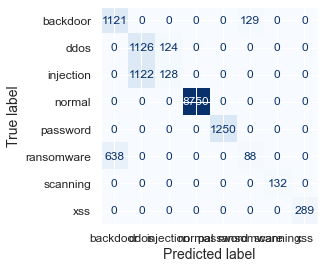

In [34]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['backdoor', 'ddos', 'injection', 'normal', 'password',
       'ransomware', 'scanning', 'xss'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## KNeighborsClassifier

In [35]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [36]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [37]:
X_train.head(3)

,door_state,sphone_signal,Day,Month,year
25742,closed,0,26,4,2019
30524,closed,0,28,4,2019
39942,closed,false,31,3,2019


In [38]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'euclidean', 'classificador__n_neighbors': 5, 'feature_selection__max_features': 1}


In [39]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.86037 +- 0.01410


In [40]:
y_pred = grid_search.predict(X_test)

In [41]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.63      1.00      0.77      1250
        ddos       0.00      0.00      0.00      1250
   injection       0.50      1.00      0.67      1250
      normal       1.00      1.00      1.00      8750
    password       1.00      1.00      1.00      1250
  ransomware       0.00      0.00      0.00       726
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       289

    accuracy                           0.87     14897
   macro avg       0.64      0.75      0.68     14897
weighted avg       0.79      0.87      0.82     14897



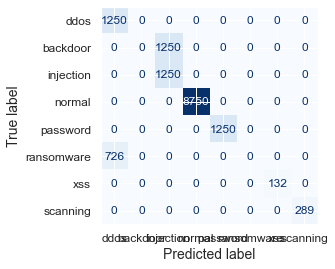

In [42]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

In [43]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

In [44]:
param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [46]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 2, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 2, 'classificador__min_samples_split': 4, 'classificador__n_estimators': 100, 'classificador__subsample': 0.8, 'feature_selection__max_features': 3}


In [47]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.86769 +- 0.00054


In [48]:
y_pred = grid_search.predict(X_test)

In [49]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.63      1.00      0.77      1250
        ddos       0.50      0.90      0.64      1250
   injection       0.51      0.10      0.17      1250
      normal       1.00      1.00      1.00      8750
    password       1.00      1.00      1.00      1250
  ransomware       0.00      0.00      0.00       726
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       289

    accuracy                           0.87     14897
   macro avg       0.71      0.75      0.70     14897
weighted avg       0.84      0.87      0.83     14897



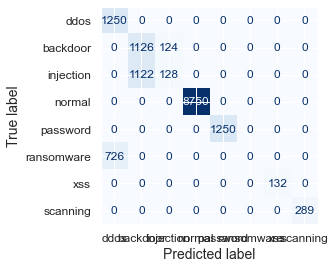

In [50]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Nayve Bayes BernoulliNB

In [51]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [52]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [53]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.1, 'feature_selection__max_features': 2}


In [54]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.68017 +- 0.00005


In [55]:
y_pred = grid_search.predict(X_test)

In [56]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.21      1.00      0.34      1250
        ddos       0.00      0.00      0.00      1250
   injection       0.00      0.00      0.00      1250
      normal       1.00      1.00      1.00      8750
    password       0.00      0.00      0.00      1250
  ransomware       0.00      0.00      0.00       726
    scanning       1.00      1.00      1.00       132
         xss       0.00      0.00      0.00       289

    accuracy                           0.68     14897
   macro avg       0.28      0.38      0.29     14897
weighted avg       0.61      0.68      0.63     14897



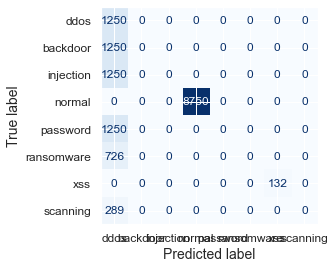

In [57]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Linear Discriminant Analysis

In [58]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [59]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [60]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'svd', 'feature_selection__max_features': 2}


In [61]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.78013 +- 0.03519


In [62]:
y_pred = grid_search.predict(X_test)

In [63]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.52      1.00      0.69      1250
        ddos       0.48      0.90      0.62      1250
   injection       0.00      0.00      0.00      1250
      normal       1.00      1.00      1.00      8750
    password       0.81      0.90      0.85      1250
  ransomware       0.00      0.00      0.00       726
    scanning       0.00      0.00      0.00       132
         xss       0.00      0.00      0.00       289

    accuracy                           0.82     14897
   macro avg       0.35      0.47      0.40     14897
weighted avg       0.74      0.82      0.77     14897



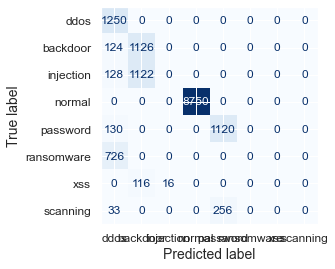

In [64]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine DecisionTreeClassifier

In [65]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [66]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [67]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'gini', 'classificador__max_depth': 6, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'feature_selection__max_features': 1}


In [68]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.86740 +- 0.00004


In [69]:
y_pred = grid_search.predict(X_test)

In [70]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.63      1.00      0.77      1250
        ddos       0.50      1.00      0.67      1250
   injection       0.00      0.00      0.00      1250
      normal       1.00      1.00      1.00      8750
    password       1.00      1.00      1.00      1250
  ransomware       0.00      0.00      0.00       726
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       289

    accuracy                           0.87     14897
   macro avg       0.64      0.75      0.68     14897
weighted avg       0.79      0.87      0.82     14897



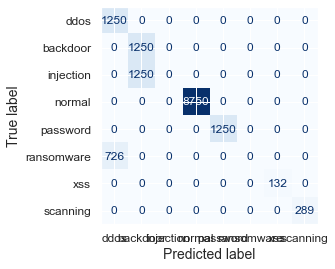

In [71]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine RandomForestClassifier

In [72]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', RandomForestClassifier())
])

param_grid_RFC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__n_estimators': [100, 300, 500],
    'classificador__max_depth': [3, 5, 7],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline_rfc, param_grid=param_grid_RFC, cv=5, n_jobs=-1, refit=True)

In [73]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('categorical',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('cat',
                                                                                          OrdinalEncoder(),
                                                                                          ['door_state',
                                                                                           'sphone_signal'])])),
                                                        ('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__bootstrap': [True, False],
                         'classificador__max_depth': [3, 5, 7],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'classificador__n_estimators': [100, 300, 500],
                         'feature_selection__max_features': [1, 2, 3]})

In [74]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__bootstrap': True, 'classificador__max_depth': 5, 'classificador__max_features': 'log2', 'classificador__min_samples_leaf': 4, 'classificador__min_samples_split': 10, 'classificador__n_estimators': 100, 'feature_selection__max_features': 2}


In [75]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.86769 +- 0.00054


In [76]:
y_pred = grid_search.predict(X_test)

In [77]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       0.63      1.00      0.77      1250
        ddos       0.50      0.90      0.64      1250
   injection       0.51      0.10      0.17      1250
      normal       1.00      1.00      1.00      8750
    password       1.00      1.00      1.00      1250
  ransomware       0.00      0.00      0.00       726
    scanning       1.00      1.00      1.00       132
         xss       1.00      1.00      1.00       289

    accuracy                           0.87     14897
   macro avg       0.71      0.75      0.70     14897
weighted avg       0.84      0.87      0.83     14897



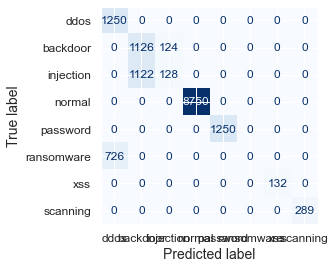

In [78]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Support Vector Machine (SVC)

In [79]:
pipeline_svc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', SVC())
])

param_grid_SVC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__C': [0.1, 1, 10, 100],
    'classificador__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classificador__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'classificador__shrinking': [True, False],
    'classificador__tol': [0.001, 0.01, 0.1]}

grid_search = GridSearchCV(pipeline_svc, param_grid=param_grid_SVC, cv=5, n_jobs=-1, refit=True)

In [80]:
# fit
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

In [ ]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

In [ ]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss'], 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()